***
### Import modules : 

In [1]:
import os 
import pandas as pd 
from tqdm import tqdm
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef


***
### Read the matrices :

In [2]:
path_finetuning = "/media/concha-eloko/Linux/PPT_clean/in_vitro/fine_tuning"

bea_df = pd.read_csv(f"{path_finetuning}/bea_fine_tuning.df", sep = "\t", header = 0)
bea_df["Protein"] = bea_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_bea = set([kltype.strip() for kltypes in bea_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

ferriol_df = pd.read_csv(f"{path_finetuning}/ferriol_fine_tuning.df", sep = "\t", header = 0)
ferriol_df["Target"] = ferriol_df["Target"].apply(lambda x : x.replace("K", "KL"))
pool_ferriol = set([kltype.strip() for kltypes in ferriol_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

towndsend_df = pd.read_csv(f"{path_finetuning}/towndsend_fine_tuning.df", sep = "\t", header = 0)
towndsend_df["Protein"] = towndsend_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_towndsend = set([kltype.strip() for kltypes in towndsend_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

dico_matrices = {"ferriol" : {"matrix" : ferriol_df, "pool" : pool_ferriol}, 
                 "bea" : {"matrix": bea_df, "pool" : pool_bea}, 
                 "towndsend" : {"matrix" : towndsend_df, "pool" : pool_towndsend}}

# targets dico : 
dico_hits = {}
for author in dico_matrices :
    matrix = dico_matrices[author]["matrix"]
    for _, row in matrix.iterrows() : 
        for phage in matrix["Phages"].unique() : 
            all_targets = set()
            targets = matrix[matrix["Phages"] == phage]["Target"].values
            for calls in targets : 
                actual_targets = [x.strip() for x in calls.split(",")]
                all_targets.update(actual_targets)
            dico_hits[phage] = all_targets



> TropiGATv2 DF : 

In [216]:
path_project = "/media/concha-eloko/Linux/PPT_clean"

DF_info = pd.read_csv(f"{path_project}/TropiGATv2.final_df_v2.filtered.tsv", sep = "\t" ,  header = 0)

DF_info_lvl_0 = DF_info.copy()
df_prophages = DF_info_lvl_0.drop_duplicates(subset = ["Phage"])
dico_prophage_count = dict(Counter(df_prophages["KL_type_LCA"]))

KLtypes = [kltype for kltype in dico_prophage_count if dico_prophage_count[kltype] >= 20]



***
## Working on the final matrices file :

In [217]:
path_project = "/media/concha-eloko/Linux/PPT_clean"


raw_df = pd.read_csv(f"{path_project}/raw_metrics.classic_2002.bit75.top40.detailed.tsv" , sep = "\t", header = 0)

phages_to_ignore = ["K2064PH2","K2069PH1","OBHDAGOG","A1e","A1f","A3a","EONHMLJF"]

working_df = raw_df[~raw_df["Phage"].isin(phages_to_ignore)]


In [9]:
working_df

,Phage,Protein,Folds,TropiGAT_predictions,TropiGAT_good_calls,TropiSeq_predictions,TropiSeq_good_calls,Targets
0,A1a,A1a_00002,6-bladed beta-propeller,KL123:0.977 ; KL14:0.911 ; KL13:0.9 ; KL39:0.8...,0,KL102:0.691,0,KL151
1,A1a,A1a_00014,right-handed beta-helix,KL45:0.878 ; KL2:0.741 ; KL74:0.57 ; KL48:0.52...,0,KL151:0.698,KL151,KL151
2,A1b,A1b_00048,right-handed beta-helix,KL128:0.919 ; KL70:0.885 ; KL52:0.862 ; KL46:0...,0,KL157:0.729,KL157,KL157
3,A1b,A1b_00036,6-bladed beta-propeller,KL7:0.983 ; KL13:0.975 ; KL123:0.971 ; KL14:0....,0,KL102:0.691,0,KL157
4,A1c,A1c_00046,6-bladed beta-propeller,KL13:0.958 ; KL123:0.951 ; KL19:0.92 ; KL14:0....,0,KL102:0.691,0,KL1
...,...,...,...,...,...,...,...,...
225,S13a,S13a_00036,right-handed beta-helix,KL18:0.959 ; KL27:0.938 ; KL60:0.87 ; KL123:0....,0,KL38:0.822,0,"KL149,KL102"
226,S13b,S13b_00058,right-handed beta-helix,KL47:0.988 ; KL14:0.921 ; KL23:0.752 ; KL64:0....,0,KL63:0.867,KL63,KL63
227,S13c,S13c_00055,right-handed beta-helix,KL27:0.958 ; KL38:0.955 ; KL60:0.92 ; KL57:0.9...,0,No predictions,0,"KL149,KL102"
228,S13d,S13d_00057,right-handed beta-helix,KL14:0.999 ; KL52:0.973 ; KL38:0.954 ; KL27:0....,KL14,KL14:0.736,KL14,KL14


In [7]:
path_finetuning = "/media/concha-eloko/Linux/PPT_clean/in_vitro/fine_tuning"

bea_df = pd.read_csv(f"{path_finetuning}/bea_fine_tuning.df", sep = "\t", header = 0)
bea_df["Protein"] = bea_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_bea = set([kltype.strip() for kltypes in bea_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

ferriol_df = pd.read_csv(f"{path_finetuning}/ferriol_fine_tuning.df", sep = "\t", header = 0)
ferriol_df["Target"] = ferriol_df["Target"].apply(lambda x : x.replace("K", "KL"))
pool_ferriol = set([kltype.strip() for kltypes in ferriol_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

towndsend_df = pd.read_csv(f"{path_finetuning}/towndsend_fine_tuning.df", sep = "\t", header = 0)
towndsend_df["Protein"] = towndsend_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_towndsend = set([kltype.strip() for kltypes in towndsend_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

dico_matrices = {"ferriol" : {"matrix" : ferriol_df, "pool" : pool_ferriol}, 
                 "bea" : {"matrix": bea_df, "pool" : pool_bea}, 
                 "towndsend" : {"matrix" : towndsend_df, "pool" : pool_towndsend}}

# targets dico : 
dico_hits = {}
for author in dico_matrices :
    matrix = dico_matrices[author]["matrix"]
    for _, row in matrix.iterrows() : 
        for phage in matrix["Phages"].unique() : 
            all_targets = set()
            targets = matrix[matrix["Phages"] == phage]["Target"].values
            for calls in targets : 
                actual_targets = [x.strip() for x in calls.split(",")]
                all_targets.update(actual_targets)
            dico_hits[phage] = all_targets

***
## Make the matrices files : 

In [11]:
from tqdm import tqdm

top_n = 15
labels_tropigat = {}
count_kltypes = {}

for kltype in tqdm(dico_prophage_count) : 
    n = 0
    pred_labels , real_labels = [] , []
    for author in dico_matrices :
        if kltype in dico_matrices[author]["pool"] : 
            matrix = dico_matrices[author]["matrix"]
            for phage in matrix["Phages"].unique() :
                top_predictions = set()
                predictions = tropigat_results[tropigat_results["Phage"] == phage]["TropiGAT_predictions"].values
                for calls in predictions : 
                    predicted_kltypes = [x.split(":")[0].strip() for x in calls.split(";")]
                    top_predictions.update(predicted_kltypes[0:top_n-1])
                if kltype in top_predictions : 
                    pred_labels.append(1)
                else : 
                    pred_labels.append(0)
                if kltype in dico_hits[phage] : 
                    real_labels.append(1)
                    n += 1 
                else :
                    real_labels.append(0)
    labels_tropigat[kltype] = {"y_pred" : pred_labels, "real_labels" : real_labels}
    count_kltypes[kltype] = n 

labels_tropigat
sorted_dict = dict(sorted(labels_tropigat.items(), key=lambda item: int(item[0].split("KL")[1])))


100%|████████████████████████████████████████| 128/128 [00:01<00:00, 115.65it/s]


In [12]:
def make_labels(pred_df, predictor = "tropigat" , top_n = 15, to_ignore = []) :
    dico_pred = {"tropigat" : "TropiGAT_predictions" ,
                 "tropiseq" : "TropiSeq_predictions"}
    col = dico_pred[predictor]
    labels_tropigat = {}
    count_kltypes = {}
    for kltype in tqdm(dico_prophage_count) : 
        n = 0
        pred_labels , real_labels = [] , []
        for author in dico_matrices :
            if kltype in dico_matrices[author]["pool"] : 
                matrix = dico_matrices[author]["matrix"]
                for phage in matrix["Phages"].unique() :
                    #if phage not in to_ignore : 
                    if phage not in to_ignore and phage in pred_df["Phage"].tolist(): 
                        top_predictions = set()
                        predictions = pred_df[pred_df["Phage"] == phage][col].values
                        for calls in predictions : 
                            predicted_kltypes = [x.split(":")[0].strip() for x in calls.split(";")]
                            top_predictions.update(predicted_kltypes[0:top_n-1])
                        if kltype in top_predictions : 
                            pred_labels.append(1)
                        else : 
                            pred_labels.append(0)
                        if kltype in dico_hits[phage] : 
                            real_labels.append(1)
                            n += 1 
                        else :
                            real_labels.append(0)
        labels_tropigat[kltype] = {"y_pred" : pred_labels, "real_labels" : real_labels}
        sorted_dict = dict(sorted(labels_tropigat.items(), key=lambda item: int(item[0].split("KL")[1])))
        count_kltypes[kltype] = n 
    return sorted_dict , labels_tropigat, count_kltypes


def decript_dic (sorted_dict , labels_tropigat, count_kltypes) :
    for kltype in sorted_dict : 
        try : 
            if len(labels_tropigat[kltype]["real_labels"]) > 1 : 
                if Counter(labels_tropigat[kltype]["y_pred"])[1] > 0 :
                    f1 = f1_score(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"], average='binary')
                    precision = precision_score(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"], average='binary')
                    recall = recall_score(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"], average='binary')
                    mcc = matthews_corrcoef(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"])
                    accuracy = accuracy_score(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"])
                    auc = roc_auc_score(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"])
                    print(kltype ,count_kltypes[kltype], round(f1,5),round(accuracy,5), round(recall,5),round(precision,5),round(auc,5), round(mcc,5), sep = "\t")
                #aucs.append(auc)
        except ValueError : 
            print(kltype , "error", sep = "\t")



### Work on TropiGAT : 

> Full predictions : 

In [13]:
tropigat_results_gat = tropigat_results[(tropigat_results["Targets"].str.count("pass") == 0)]

sorted_dic_tropigat, labels_tropigat, count_kltypes = make_labels(tropigat_results_gat, to_ignore = phages_to_ignore)
decript_dic(sorted_dic_tropigat, labels_tropigat, count_kltypes)

100%|████████████████████████████████████████| 128/128 [00:01<00:00, 114.62it/s]


KL1	3	0.0	0.90909	0.0	0.0	0.46875	-0.0449
KL2	16	0.32258	0.82353	0.3125	0.33333	0.60771	0.22141
KL3	12	0.42105	0.45	0.33333	0.57143	0.47917	-0.0428
KL5	1	0.0	0.64062	0.0	0.0	0.3254	-0.09118
KL7	2	0.0	0.4375	0.0	0.0	0.22581	-0.1912
KL8	1	0.0	0.85938	0.0	0.0	0.43651	-0.04762
KL9	1	0.14286	0.8125	1.0	0.07692	0.90476	0.24954
KL10	1	0.2	0.875	1.0	0.11111	0.93651	0.31145
KL12	1	0.0	0.8125	0.0	0.0	0.4127	-0.0574
KL13	3	0.09524	0.42424	1.0	0.05	0.70312	0.14252
KL14	10	0.06897	0.31933	0.3	0.03896	0.31055	-0.21997
KL15	1	0.05714	0.48438	1.0	0.02941	0.7381	0.11835
KL16	4	0.4	0.97479	0.25	1.0	0.625	0.4936
KL17	2	0.4	0.95312	0.5	0.33333	0.73387	0.38503
KL18	1	0.04444	0.32812	1.0	0.02273	0.65873	0.08494
KL19	1	0.06452	0.54688	1.0	0.03333	0.76984	0.13412
KL21	1	0.28571	0.92188	1.0	0.16667	0.96032	0.39171
KL22	10	0.53846	0.87879	0.7	0.4375	0.79944	0.49027
KL23	1	0.0	0.70312	0.0	0.0	0.35714	-0.07881
KL24	5	0.26667	0.88889	0.4	0.2	0.65745	0.22883
KL25	3	0.21429	0.77778	1.0	0.12	0.88542	0.30414
KL27	2	0.

***
> Work on TropiSeq :

In [15]:
sorted_dic_tropiseq, labels_tropiseq, count_kltypes = make_labels(tropigat_results, predictor = "tropiseq",  to_ignore = phages_to_ignore)
decript_dic(sorted_dic_tropiseq, labels_tropiseq, count_kltypes)

100%|████████████████████████████████████████| 128/128 [00:01<00:00, 111.69it/s]


KL2	16	0.28571	0.87903	0.1875	0.6	0.58449	0.28797
KL3	12	0.4	0.59091	0.25	1.0	0.625	0.36274
KL4	7	0.25	0.93023	0.14286	1.0	0.57143	0.36438
KL9	1	0.66667	0.98438	1.0	0.5	0.99206	0.70147
KL13	3	0.5	0.98039	0.33333	1.0	0.66667	0.57161
KL14	10	0.16667	0.91935	0.1	0.5	0.54561	0.19719
KL15	1	1.0	1.0	1.0	1.0	1.0	1.0
KL16	4	0.57143	0.97581	0.5	0.66667	0.74583	0.56538
KL17	2	0.66667	0.98438	0.5	1.0	0.75	0.70147
KL18	1	0.0	0.95312	0.0	0.0	0.48413	-0.02263
KL20	1	0.0	0.98039	0.0	0.0	0.49505	-0.0099
KL21	1	0.5	0.96875	1.0	0.33333	0.98413	0.56811
KL23	1	0.66667	0.98438	1.0	0.5	0.99206	0.70147
KL24	5	0.4	0.94118	0.4	0.4	0.68454	0.36907
KL25	3	0.85714	0.9902	1.0	0.75	0.99495	0.86164
KL27	2	0.66667	0.98438	0.5	1.0	0.75	0.70147
KL28	14	0.1	0.85484	0.07143	0.16667	0.51299	0.03831
KL30	3	0.33333	0.96078	0.33333	0.33333	0.65657	0.31313
KL31	1	0.0	0.96875	0.0	0.0	0.49206	-0.01587
KL35	7	0.57143	0.93023	0.57143	0.57143	0.76673	0.53345
KL39	3	0.0	0.92188	0.0	0.0	0.48361	-0.03983
KL43	2	0.0	0.95312	0.0	0.0	0.

***
# Good calls : 

In [27]:
import os 
import pandas as pd 
from itertools import product

path_project = "/media/concha-eloko/Linux/PPT_clean"

raw_df = pd.read_csv(f"{path_project}/raw_metrics.classic_2002.bit75.top40.detailed.tsv" , sep = "\t", header = 0)

phages_to_ignore = ["K2064PH2","K2069PH1","OBHDAGOG","A1e","A1f","A3a","EONHMLJF"]
working_df = raw_df[~raw_df["Phage"].isin(phages_to_ignore)]


In [219]:
working_df

,Phage,Protein,Folds,TropiGAT_predictions,TropiGAT_good_calls,TropiSeq_predictions,TropiSeq_good_calls,Targets
0,A1a,A1a_00002,6-bladed beta-propeller,KL123:0.977 ; KL14:0.911 ; KL13:0.9 ; KL39:0.8...,0,KL102:0.737,0,KL151
1,A1a,A1a_00014,right-handed beta-helix,KL45:0.878 ; KL2:0.741 ; KL74:0.57 ; KL48:0.52...,0,KL151:0.599,KL151,KL151
2,A1b,A1b_00048,right-handed beta-helix,KL128:0.919 ; KL70:0.885 ; KL52:0.862 ; KL46:0...,0,No predictions,0,KL157
3,A1b,A1b_00036,6-bladed beta-propeller,KL7:0.983 ; KL13:0.975 ; KL123:0.971 ; KL14:0....,0,KL102:0.737,0,KL157
4,A1c,A1c_00046,6-bladed beta-propeller,KL13:0.958 ; KL123:0.951 ; KL19:0.92 ; KL14:0....,0,KL102:0.737,0,KL1
...,...,...,...,...,...,...,...,...
225,S13a,S13a_00036,right-handed beta-helix,KL18:0.959 ; KL27:0.938 ; KL60:0.87 ; KL123:0....,0,No predictions,0,"KL149,KL102"
226,S13b,S13b_00058,right-handed beta-helix,KL47:0.988 ; KL14:0.921 ; KL23:0.752 ; KL64:0....,0,KL63:0.641,KL63,KL63
227,S13c,S13c_00055,right-handed beta-helix,KL27:0.958 ; KL38:0.955 ; KL60:0.92 ; KL57:0.9...,0,No predictions,0,"KL149,KL102"
228,S13d,S13d_00057,right-handed beta-helix,KL14:0.999 ; KL52:0.973 ; KL38:0.954 ; KL27:0....,KL14,KL14:0.951,KL14,KL14


> Functions : 

In [28]:
def get_all_combinations(raw_df, to_ignore = []) :
    all_combinations = set()
    for phage in raw_df["Phage"].unique() : 
        if phage not in to_ignore :
            tmp_df = raw_df[raw_df["Phage"] == phage]
            targets_list = list(set(tmp_df["Targets"].tolist()[0].split(",")))
            combinations = set(product([phage], targets_list))
            all_combinations = all_combinations.union(combinations)
    return all_combinations

In [25]:
def get_calls_metrics(raw_df , top_n = 15, to_ignore = []) :
    total_calls = []
    TropiGAT_good_calls = []
    TropiSeq_good_calls = []
    
    for phage in raw_df["Phage"].unique() : 
        if phage not in to_ignore :
            tmp_df = raw_df[raw_df["Phage"] == phage]
            targets_set = set(tmp_df["Targets"].tolist()[0].split(","))
            n_targets = len(targets_set)
            combinations = set(product([phage], list(targets_set)))
            total_calls = total_calls + list(combinations)
            if "".join((list(targets_set)[0])).count("pass") == 0 : 
                #total_calls += n_targets
                # TropiGAT calls : 
                call_tropigat = set()
                for calls in tmp_df["TropiGAT_predictions"] :
                    top_n_predictions = [x.split(":")[0].strip() for x in calls.split(";")][0:top_n-1]
                    call_tropigat.update(top_n_predictions)
                good_calls_tropigat = call_tropigat.intersection(targets_set)
                if len(good_calls_tropigat) > 0 :
                    for kltype in good_calls_tropigat : 
                        a = (phage , kltype)
                        TropiGAT_good_calls.append(a)
                # TropiSeq calls : 
                call_tropiseq = set()
                for calls in tmp_df["TropiSeq_predictions"] :
                    top_n_predictions = [x.split(":")[0].strip() for x in calls.split(";")][0:top_n-1]
                    call_tropiseq.update(top_n_predictions)
                good_calls_tropiseq = call_tropiseq.intersection(targets_set)
                if len(good_calls_tropiseq) > 0 :
                    for kltype in good_calls_tropiseq : 
                        a = (phage , kltype)
                        TropiSeq_good_calls.append(a)
    all_calls = set(TropiGAT_good_calls).union(set(TropiSeq_good_calls))

    return total_calls, all_calls , TropiGAT_good_calls , TropiSeq_good_calls


In [22]:
def get_bad_calls_metrics(raw_df , top_n = 15, to_ignore = []) :
    total_calls = []
    TropiGAT_bad_calls = []
    TropiSeq_bad_calls = []
    for phage in raw_df["Phage"].unique() : 
        if phage not in to_ignore :
            tmp_df = raw_df[raw_df["Phage"] == phage]
            targets_set = set(tmp_df["Targets"].tolist()[0].split(","))
            n_targets = len(targets_set)
            if "".join((list(targets_set)[0])).count("pass") == 0 : 
                total_calls += n_targets
                # TropiGAT calls : 
                top_n_predictions_all = []
                for calls in tmp_df["TropiGAT_predictions"] :
                    top_n_predictions = [x.split(":")[0].strip() for x in calls.split(";")][0:top_n-1]
                    top_n_predictions_all = top_n_predictions_all + top_n_predictions
                bad_call_tropigat = targets_set - set(top_n_predictions_all)
                if len(bad_call_tropigat) > 0 :
                    for kltype in bad_call_tropigat : 
                        a = (phage , kltype)
                        TropiGAT_bad_calls.append(a)                        
                # TropiSeq calls : 
                top_n_predictions_all = []
                for calls in tmp_df["TropiSeq_predictions"] :
                    top_n_predictions = [x.split(":")[0].strip() for x in calls.split(";")][0:top_n-1]
                    top_n_predictions_all = top_n_predictions_all + top_n_predictions
                bad_call_tropiseq = targets_set - set(top_n_predictions_all)
                if len(bad_call_tropiseq) > 0 :
                    for kltype in bad_call_tropiseq : 
                        a = (phage , kltype)
                        TropiSeq_bad_calls.append(a)
    all_calls = set(TropiGAT_bad_calls).union(set(TropiSeq_bad_calls))

    return total_calls, all_calls , TropiGAT_bad_calls , TropiSeq_bad_calls

> All predictions : 

In [222]:
combinations = get_all_combinations(working_df)
len(combinations)


274

In [250]:
total_calls, all_calls , TropiGAT_good_calls , TropiSeq_good_calls = get_calls_metrics(working_df, top_n = 40, to_ignore = phages_to_ignore)
len(total_calls), len(all_calls) , len(TropiGAT_good_calls) , len(TropiSeq_good_calls)


(274, 111, 93, 47)

In [184]:
def get_n_KLtypes(calls) : 
    n = len(set([item[1] for item in calls]))
    return n

TropiGAT_good_calls

[('D7c', 'KL28'),
 ('K14PH164C1', 'KL14'),
 ('K17alfa62', 'KL62'),
 ('K17alfa62', 'KL17'),
 ('K24PH164C1', 'KL24'),
 ('K26PH128C1', 'KL74'),
 ('K27PH129C1', 'KL27'),
 ('K37PH164C1', 'KL2'),
 ('K38PH09C2', 'KL38'),
 ('K43PH164C1', 'KL43'),
 ('K46PH129', 'KL46'),
 ('K57lambda1_2', 'KL57'),
 ('K60PH164C1', 'KL18'),
 ('K60PH164C1', 'KL60'),
 ('K74PH129C2', 'KL74'),
 ('LCALLHIG', 'KL3'),
 ('OPBIHMGG', 'KL3'),
 ('PFOEGONH', 'KL3'),
 ('PP187', 'KL110'),
 ('S10a', 'KL25'),
 ('S11a', 'KL25'),
 ('S13d', 'KL14')]

***
### Look into the folds : 

In [225]:
import os 
import pandas as pd 
from itertools import product

path_project = "/media/concha-eloko/Linux/PPT_clean"

raw_df = pd.read_csv(f"{path_project}/raw_metrics.classic_2002.bit75.top40.detailed.tsv" , sep = "\t", header = 0)

phages_to_ignore = ["K2064PH2","K2069PH1","OBHDAGOG","A1e","A1f","A3a","EONHMLJF"]
working_df = raw_df[~raw_df["Phage"].isin(phages_to_ignore)]

In [226]:
phages_propeller = working_df[working_df["Folds"] == "6-bladed beta-propeller"]["Phage"].unique()
non_propeller_phages = working_df[~ working_df["Phage"].isin(phages_propeller)]["Phage"].unique()


In [227]:
working_df_propeller = working_df[working_df["Phage"].isin(phages_propeller)]
working_df_non_propeller = working_df[~working_df["Phage"].isin(phages_propeller)]


> eyes on propeller : 

In [228]:
total_calls, all_calls , TropiGAT_good_calls , TropiSeq_good_calls = get_calls_metrics(working_df_propeller, top_n = 15, to_ignore = phages_to_ignore)
len(total_calls), len(all_calls) , len(TropiGAT_good_calls) , len(TropiSeq_good_calls)
non_called = set(total_calls) - set(all_calls)
len(non_called)

134

> eyes on non propeller :

In [229]:
total_calls, all_calls , TropiGAT_good_calls , TropiSeq_good_calls = get_calls_metrics(working_df_non_propeller, top_n = 15, to_ignore = phages_to_ignore)
len(total_calls), len(all_calls) , len(TropiGAT_good_calls) , len(TropiSeq_good_calls)
non_called = set(total_calls) - set(all_calls)
len(non_called)

44

In [54]:
called_phages = set([pred[0] for pred in all_calls])
len(called_phages)

53

In [187]:
working_df

,Phage,Protein,Folds,TropiGAT_predictions,TropiGAT_good_calls,TropiSeq_predictions,TropiSeq_good_calls,Targets
0,A1a,A1a_00002,6-bladed beta-propeller,KL123:0.977 ; KL14:0.911 ; KL13:0.9 ; KL39:0.8...,0,KL102:0.691,0,KL151
1,A1a,A1a_00014,right-handed beta-helix,KL45:0.878 ; KL2:0.741 ; KL74:0.57 ; KL48:0.52...,0,KL151:0.698,KL151,KL151
2,A1b,A1b_00048,right-handed beta-helix,KL128:0.919 ; KL70:0.885 ; KL52:0.862 ; KL46:0...,0,KL157:0.729,KL157,KL157
3,A1b,A1b_00036,6-bladed beta-propeller,KL7:0.983 ; KL13:0.975 ; KL123:0.971 ; KL14:0....,0,KL102:0.691,0,KL157
4,A1c,A1c_00046,6-bladed beta-propeller,KL13:0.958 ; KL123:0.951 ; KL19:0.92 ; KL14:0....,0,KL102:0.691,0,KL1
...,...,...,...,...,...,...,...,...
225,S13a,S13a_00036,right-handed beta-helix,KL18:0.959 ; KL27:0.938 ; KL60:0.87 ; KL123:0....,0,KL38:0.822,0,"KL149,KL102"
226,S13b,S13b_00058,right-handed beta-helix,KL47:0.988 ; KL14:0.921 ; KL23:0.752 ; KL64:0....,0,KL63:0.867,KL63,KL63
227,S13c,S13c_00055,right-handed beta-helix,KL27:0.958 ; KL38:0.955 ; KL60:0.92 ; KL57:0.9...,0,No predictions,0,"KL149,KL102"
228,S13d,S13d_00057,right-handed beta-helix,KL14:0.999 ; KL52:0.973 ; KL38:0.954 ; KL27:0....,KL14,KL14:0.736,KL14,KL14


***
## Get the random model :

In [1]:
import os 
import numpy as np
import random
import pandas as pd 

path_work = "/media/concha-eloko/Linux/PPT_clean"

raw_df = pd.read_csv(f"{path_work}/raw_metrics.classic_2002.bit75.top40.detailed.tsv" , sep = "\t", header = 0)

phages_to_ignore = ["K2064PH2","K2069PH1","OBHDAGOG","A1e","A1f","A3a","EONHMLJF"]
working_df = raw_df[~raw_df["Phage"].isin(phages_to_ignore)]
kltypes_TropiGAT = pd.read_csv(f"{path_work}/TropiGAT_KLtypes.tsv", names = ["KL_types"])
kltypes_TropiSeq = pd.read_csv(f"{path_work}/TropiSeq_KLtypes.tsv", names = ["KL_types"])


> Compute the dico :

In [231]:
def random_selection_and_ranking(elements, n, m, bootstrap):
    counts = []
    for _ in range(bootstrap):
        count_top_n = 0
        for _ in range(m):
            # Step 1: Select a random element from the list
            random_element = random.choice(elements)
            # Step 2: Assign a random number between 0 and 1 to each element
            random_numbers = {element: random.random() for element in elements}
            # Step 3: Filter elements with random numbers > 0.5 and rank them
            filtered_elements = [element for element, rand_num in random_numbers.items() if rand_num > 0.5]
            ranked_elements = sorted(filtered_elements, key=lambda x: random_numbers[x], reverse=True)
            # Step 4: Check if the randomly picked element is present in the top n elements
            if random_element in ranked_elements[:n]:
                count_top_n += 1
        counts.append(count_top_n)
    
    return sum(counts) / len(counts)

In [137]:
def random_selection_and_ranking(elements, n, m, bootstrap):
    counts = []
    for _ in range(bootstrap):
        count_top_n = 0
        for _ in range(m):
            if random.choice(elements) in sorted(
                [(rand_num, element) for rand_num, element in {random.random(): element for element in elements}.items() if rand_num > 0.5],
                key=lambda x: x[1],
                reverse=True
            )[:n]:
                count_top_n += 1
        counts.append(count_top_n)
    
    return sum(counts) / len(counts)

In [233]:
%%time
random_tropigat_serie = []
random_tropiseq_serie = []

for n in range(1,41) : 
    # random tropigat
    random_tropigat = random_selection_and_ranking(kltypes_TropiGAT["KL_types"], n, 274, 1000)
    random_tropigat_serie.append(random_tropigat)
    # random tropiseq 
    random_tropiseq = random_selection_and_ranking(kltypes_TropiSeq["KL_types"], n, 274, 1000)
    random_tropiseq_serie.append(random_tropiseq)


CPU times: user 12min 12s, sys: 163 ms, total: 12min 12s
Wall time: 12min 13s


In [234]:
tropigat_serie = []
tropiseq_serie = []
total_serie = []

for n in range(1,42) : 
    total_calls, all_calls , TropiGAT_good_calls , TropiSeq_good_calls = get_calls_metrics(working_df, top_n = n, to_ignore = phages_to_ignore)
    tropigat_serie.append(len(TropiGAT_good_calls))
    tropiseq_serie.append(len(TropiSeq_good_calls))
    total_serie.append(len(all_calls))



In [235]:
dico_series = {
    "Random (TropiSeq approach)": {
        "values": [round(num) for num in random_tropiseq_serie],
        "color": "#ffdc73",
        "bold": False
    },
    "Random (TropiGAT approach)": {
        "values": [round(num) for num in random_tropigat_serie],
        "color": "#A3B18A",
        "bold": False
    },
    "TropiGAT": {
        "values": tropigat_serie[1:],
        "color": "#344E41",
        "bold": True
    },
    "TropiSeq": {
        "values": tropiseq_serie[1:],
        "color": "#a67c00",
        "bold": True
    },
    "TropiGAT + TropiSeq": {
        "values": total_serie[1:],
        "color": "#940000",
        "bold": True
    }
}

In [236]:
def clean_print(dico) :
	""" 
	Inputs : a dico
	Outputs : pretty printed dico
	"""
	import pprint
	pp = pprint.PrettyPrinter(width = 100, sort_dicts = True, compact = True)
	out = pp.pprint(dico)
	return out 

clean_print(dico_series)

{'Random (TropiGAT approach)': {'bold': False,
                                'color': '#A3B18A',
                                'values': [4, 8, 12, 16, 20, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61,
                                           65, 69, 74, 78, 82, 86, 90, 94, 98, 102, 106, 110, 114,
                                           118, 121, 124, 127, 129, 132, 133, 134, 135, 136, 136,
                                           137]},
 'Random (TropiSeq approach)': {'bold': False,
                                'color': '#ffdc73',
                                'values': [3, 6, 9, 12, 15, 18, 21, 25, 28, 31, 34, 37, 40, 43, 47,
                                           49, 52, 55, 58, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89,
                                           92, 96, 98, 102, 104, 108, 111, 114, 117, 119, 122]},
 'TropiGAT': {'bold': True,
              'color': '#344E41',
              'values': [22, 29, 34, 39, 40, 47, 49, 56, 60, 62, 63, 69, 75, 78, 79, 80, 84, 89,

> The dico :

In [2]:
# m set to 220
dico_series_42 = {
 #'Random (TropiSeq approach)': {'bold': False,
 #                               'color': '#ffdc73',
 #                               'values': [3, 5, 8, 10, 13, 15, 17, 20, 22, 25, 27, 30, 32, 35, 37,
 #                                          40, 42, 45, 47, 50, 52, 55, 57, 60, 62, 65, 67, 70, 72,
 #                                          75, 77, 80, 82, 85, 87, 90, 92, 94, 97, 99]},
    'TropiGAT': {'bold': False,
              'color': '#344E41',
              'values': [22, 29, 34, 39, 40, 47, 49, 56, 60, 62, 63, 69, 75, 78, 79, 80, 84, 89, 90,
                         91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93,
                         93, 93]},
    'TropiSeq': {'bold': False,
              'color': '#a67c00',
              'values': [34, 40, 40, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
                         47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
                         47, 47]},
    'TropiGAT & TropiSeq': {'bold': True,
                         'color': '#940000',
                         'values': [45, 55, 58, 65, 66, 72, 73, 78, 80, 82, 83, 88, 94, 96, 97, 98,
                                    102, 107, 108, 109, 109, 109, 109, 109, 110, 110, 110, 110, 110,
                                    110, 110, 110, 111, 111, 111, 111, 111, 111, 111, 111]},
    'Random': {'bold': False,
               'color': '#A3B18A',
               'values': [3, 7, 10, 13, 17, 20, 23, 26, 30, 33, 36, 40, 43, 46, 50,
                       53, 56, 60, 63, 67, 70, 73, 76, 80, 83, 86, 89, 93, 96,
                       98, 101, 103, 104, 106, 108, 108, 110, 110, 110, 111]},

}

In [21]:
43/274*100


15.693430656934307

In [ ]:
# m set to 274
dico_series_42 = {'Random': {'bold': False,
                                'color': '#A3B18A',
                                'values': [4, 8, 12, 16, 21, 24, 29, 33, 37, 41, 45, 50, 53, 57, 61,
                                           65, 69, 74, 78, 82, 86, 90, 94, 98, 102, 106, 110, 114,
                                           117, 121, 124, 127, 129, 131, 133, 134, 135, 136, 136,
                                           137]},
# 'Random (TropiSeq approach)': {'bold': False,
#                                'color': '#ffdc73',
#                                'values': [3, 6, 9, 12, 16, 18, 21, 25, 28, 31, 34, 37, 40, 43, 46,
#                                           49, 52, 55, 58, 61, 65, 68, 71, 74, 77, 80, 83, 86, 89,
#                                           92, 96, 98, 101, 105, 108, 110, 114, 116, 119, 122]},
 'TropiGAT': {'bold': True,
              'color': '#344E41',
              'values': [22, 29, 34, 39, 40, 47, 49, 56, 60, 62, 63, 69, 75, 78, 79, 80, 84, 89, 90,
                         91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93,
                         93, 93]},
 'TropiGAT + TropiSeq': {'bold': True,
                         'color': '#940000',
                         'values': [43, 54, 56, 57, 58, 65, 67, 74, 78, 80, 81, 86, 92, 94, 95, 96,
                                    100, 105, 106, 107, 107, 107, 107, 107, 108, 108, 108, 108, 108,
                                    108, 108, 108, 109, 109, 109, 109, 109, 109, 109, 109]},
 'TropiSeq': {'bold': True,
              'color': '#a67c00',
              'values': [31, 37, 37, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
                         39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
                         39, 39]}}

In [245]:
diferrences = [comb - rand for comb,rand in tuple(zip(dico_series_42["TropiGAT + TropiSeq"]["values"] , dico_series_42["Random"]["values"]))]
diferrences

[42,
 48,
 48,
 52,
 49,
 52,
 50,
 52,
 50,
 49,
 47,
 48,
 51,
 50,
 47,
 45,
 46,
 47,
 45,
 42,
 39,
 36,
 33,
 29,
 27,
 24,
 21,
 17,
 14,
 12,
 9,
 7,
 7,
 5,
 3,
 3,
 1,
 1,
 1,
 0]

In [255]:
diferrences = [comb - rand for comb,rand in tuple(zip(dico_series_42["TropiSeq"]["values"] , dico_series_42["Random"]["values"]))]
diferrences



[31,
 33,
 30,
 33,
 29,
 27,
 24,
 21,
 17,
 14,
 11,
 7,
 4,
 1,
 -3,
 -6,
 -9,
 -13,
 -16,
 -20,
 -23,
 -26,
 -29,
 -33,
 -36,
 -39,
 -42,
 -46,
 -49,
 -51,
 -54,
 -56,
 -57,
 -59,
 -61,
 -61,
 -63,
 -63,
 -63,
 -64]

In [180]:
92/220*100

41.81818181818181

In [1]:
47/274*100

17.153284671532848

In [104]:
dico_series = {'Random (TropiGAT approach)': {'bold': False,
                                'color': '#A3B18A',
                                'values': [3, 6, 10, 13, 17, 20, 23, 27, 30, 33, 37, 40, 43, 47, 50,
                                           53, 56, 59, 63, 66]},
 'Random (TropiSeq approach)': {'bold': False,
                                'color': '#ffdc73',
                                'values': [2, 5, 8, 10, 12, 15, 17, 20, 22, 25, 27, 30, 32, 35, 37,
                                           40, 42, 45, 47, 50]},
 'TropiGAT': {'bold': True,
              'color': '#344E41',
              'values': [22, 29, 34, 39, 40, 47, 49, 56, 60, 62, 63, 69, 75, 78, 79, 80, 84, 89, 90,
                         91]},
 'TropiGAT + TropiSeq': {'bold': True,
                         'color': '#940000',
                         'values': [43, 54, 56, 57, 58, 65, 67, 74, 78, 80, 81, 86, 92, 94, 95, 96,
                                    100, 105, 106, 107]},
 'TropiSeq': {'bold': True,
              'color': '#a67c00',
              'values': [31, 37, 37, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
                         39]}}

In [146]:
dico_series = {'Random': {'bold': False,
                                'color': '#A3B18A',
                                'values': [3, 6, 10, 13, 17, 20, 23, 27, 30, 33, 37, 40, 43, 47, 50,
                                           53, 56, 59, 63, 66]},
 'TropiGAT': {'bold': True,
              'color': '#344E41',
              'values': [22, 29, 34, 39, 40, 47, 49, 56, 60, 62, 63, 69, 75, 78, 79, 80, 84, 89, 90,
                         91]},
 'TropiGAT + TropiSeq': {'bold': True,
                         'color': '#940000',
                         'values': [43, 54, 56, 57, 58, 65, 67, 74, 78, 80, 81, 86, 92, 94, 95, 96,
                                    100, 105, 106, 107]},
 'TropiSeq': {'bold': True,
              'color': '#a67c00',
              'values': [31, 37, 37, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
                         39]}}

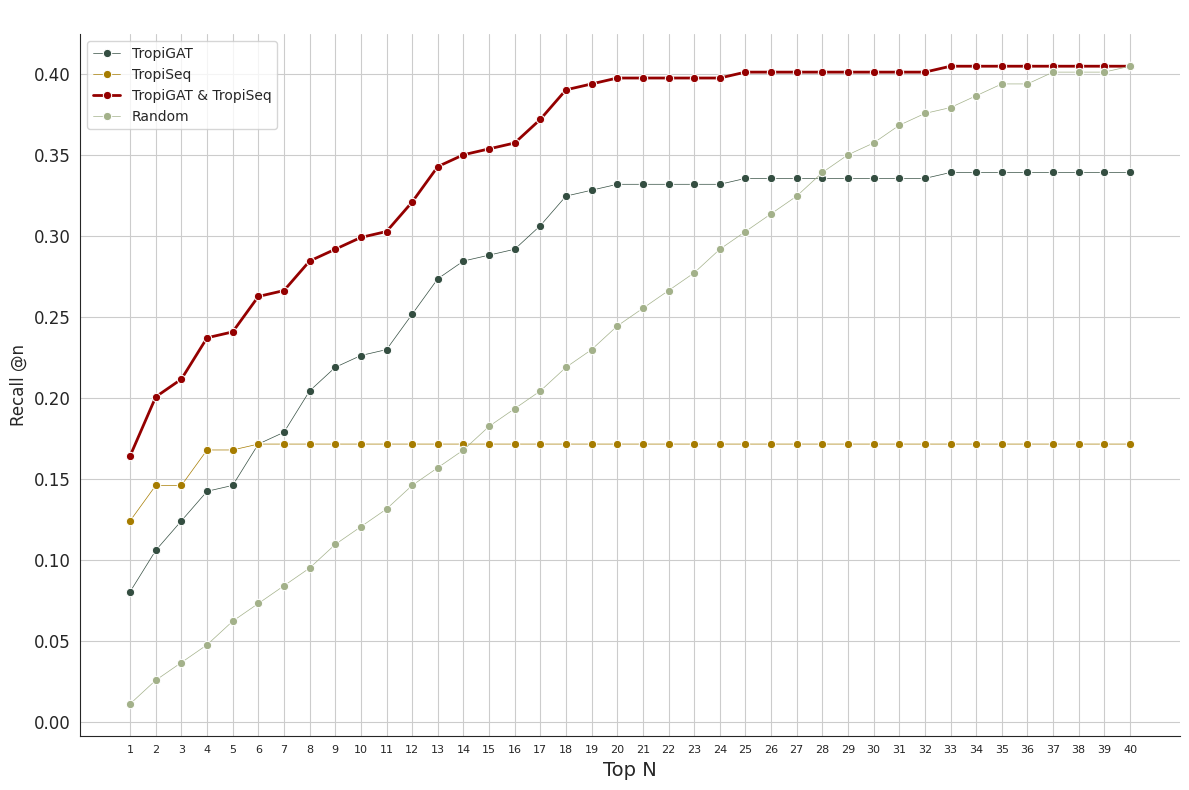

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define colors and line styles

sns.set_style("white")
sns.set_palette("muted")

# Plot each data series
plt.figure(figsize=(12, 8))
for label, series_info in dico_series_42.items():
    #values = series_info["values"]
    values = [num/274 for num in series_info["values"]]
    color = series_info["color"]
    bold = series_info["bold"]
    linestyle = '-' if bold else '-'
    linewidth = 2 if bold else 0.5
    sns.lineplot(x=range(1, len(values) + 1), y=values, label=label, marker='o', linestyle=linestyle, color=color, linewidth=linewidth, markersize=6)

# Customize the plot
plt.title(' ', fontsize=16)
plt.xlabel('Top N', fontsize=14)
plt.ylabel('Recall @N', fontsize=12)
plt.xticks(fontsize=8, rotation=0)  # Rotate x-axis tick labels horizontally
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

# Adjust x-axis ticks to integers
plt.xticks(range(1, len(values) + 1))

# Adjust spines
sns.despine()

plt.tight_layout()
plt.savefig('/media/concha-eloko/Linux/papers/PPT/figures_draft/Recall@N_PPT_Random.lytic.svg', dpi = 500)
plt.show()


> Number of KL types detected across @K

In [44]:
tropigat_kltypes_serie = []
tropiseq_kltypes_serie = []
total_kltypes_serie = []

def get_n_KLtypes(calls, detail = False) :
    n = len(set([item[1] for item in calls]))
    if detail :
        return n, set([item[1] for item in calls])
    else :
        return n 
    
for n in range(1,42) : 
    total_calls, all_calls , TropiGAT_good_calls , TropiSeq_good_calls = get_calls_metrics(working_df, top_n = n, to_ignore = phages_to_ignore)
    tropigat_kltypes_serie.append(get_n_KLtypes(TropiGAT_good_calls))
    tropiseq_kltypes_serie.append(get_n_KLtypes(TropiSeq_good_calls))
    total_kltypes_serie.append(get_n_KLtypes(all_calls))




In [36]:
dico_kltypes_series = {
    "TropiGAT": {
        "values": tropigat_kltypes_serie[1:],
        "color": "#344E41",
        "bold": False
    },
    "TropiSeq": {
        "values": tropiseq_kltypes_serie[1:],
        "color": "#a67c00",
        "bold": False
    },
    "TropiGAT + TropiSeq": {
        "values": total_kltypes_serie[1:],
        "color": "#940000",
        "bold": True
    }
}

In [40]:
def clean_print(dico) :
	""" 
	Inputs : a dico
	Outputs : pretty printed dico
	"""
	import pprint
	pp = pprint.PrettyPrinter(width = 100, sort_dicts = True, compact = True)
	out = pp.pprint(dico)
	return out 

clean_print(dico_kltypes_series)

{'TropiGAT': {'bold': True,
              'color': '#344E41',
              'values': [17, 21, 23, 25, 25, 27, 28, 28, 30, 30, 30, 32, 33, 34, 34, 34, 34, 34, 34,
                         34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35,
                         35, 35]},
 'TropiGAT + TropiSeq': {'bold': True,
                         'color': '#940000',
                         'values': [30, 35, 37, 38, 38, 40, 41, 41, 42, 42, 42, 43, 44, 44, 44, 44,
                                    44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
                                    45, 45, 45, 45, 45, 45, 45, 45]},
 'TropiSeq': {'bold': True,
              'color': '#a67c00',
              'values': [23, 25, 25, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
                         27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
                         27, 27]}}


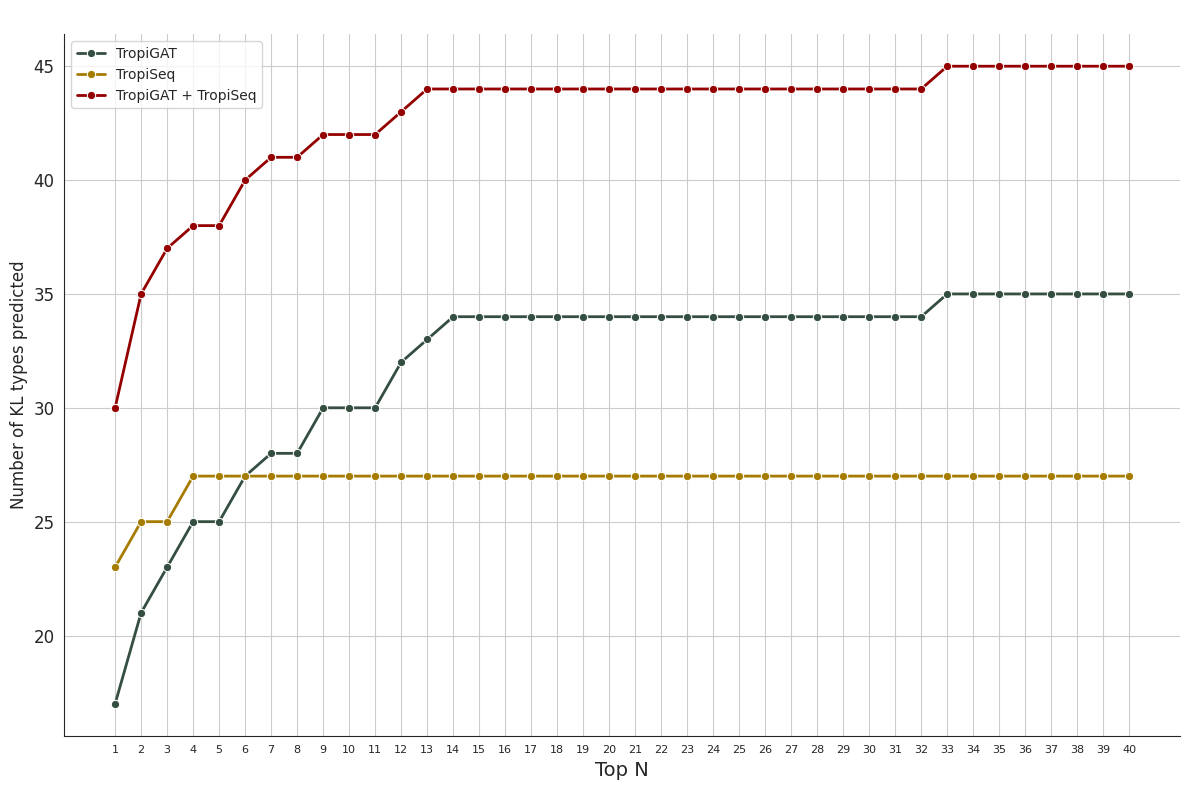

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define colors and line styles

sns.set_style("white")
sns.set_palette("muted")

# Plot each data series
plt.figure(figsize=(12, 8))
for label, series_info in dico_kltypes_series.items():
    #values = series_info["values"]
    values = [num for num in series_info["values"]]
    color = series_info["color"]
    bold = series_info["bold"]
    linestyle = '-' if bold else '-'
    linewidth = 2 if bold else 0.5
    sns.lineplot(x=range(1, len(values) + 1), y=values, label=label, marker='o', linestyle=linestyle, color=color, linewidth=linewidth, markersize=6)

# Customize the plot
plt.title(' ', fontsize=16)
plt.xlabel('Top N', fontsize=14)
plt.ylabel('Number of KL types predicted', fontsize=12)
plt.xticks(fontsize=8, rotation=0)  # Rotate x-axis tick labels horizontally
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

# Adjust x-axis ticks to integers
plt.xticks(range(1, len(values) + 1))

# Adjust spines
sns.despine()

plt.tight_layout()
plt.savefig('/media/concha-eloko/Linux/papers/PPT/figures_draft/nKLtypes@N_PPT_Random.lytic.svg', dpi = 500)
plt.show()

In [45]:
total_calls, all_calls , TropiGAT_good_calls , TropiSeq_good_calls = get_calls_metrics(working_df, top_n = 6, to_ignore = phages_to_ignore)

kl_tropigat = get_n_KLtypes(TropiGAT_good_calls, detail = True)

kl_tropiseq = get_n_KLtypes(TropiSeq_good_calls, detail = True)




In [48]:
kl_tropigat[1] - kl_tropiseq[1]

{'KL10',
 'KL13',
 'KL28',
 'KL38',
 'KL43',
 'KL46',
 'KL53',
 'KL60',
 'KL62',
 'KL74',
 'KL9'}

In [49]:
kl_tropiseq[1] - kl_tropigat[1]

{'KL139',
 'KL151',
 'KL16',
 'KL21',
 'KL30',
 'KL35',
 'KL37',
 'KL45',
 'KL51',
 'KL56',
 'KL58',
 'KL63',
 'KL66'}